In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [4]:
train_df = pd.read_csv('./train_data.tsv',sep='\t')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 5 columns):
일자      20010 non-null int64
time    20010 non-null object
식사내용    20010 non-null object
매출일자    20010 non-null float64
수량      20010 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 781.7+ KB


In [5]:
train_df.head()

,일자,time,식사내용,매출일자,수량
0,20030301,아침,"과일샐러드,닭죽,돈육마늘장조림,떡만두국,부추김무침,쌀밥,딸기잼(중),비엔나구이,스크...",20030301.0,37.472924
1,20030301,저녁,"감자으깸샐러드,비프까스,스위트피클,쌀밥,옥수수스프,",20030301.0,19.566787
2,20030301,점심,"골뱅이야채무침,새우맛살튀김,쌀밥(사무직),열무겉절이,칼국수,",20030301.0,31.191336
3,20030302,아침,"계란죽,곤약멸치조림,김치국,마카로니샐러드,쌀밥,오징어회무침,딸기잼(중),삶은계란,야...",20030302.0,36.101083
4,20030302,저녁,"계란탕,단무지잔파무침,자장소스,잡채밥,탕수만두,",20030302.0,21.949458


In [6]:
climate_df = pd.read_excel('./[과제3] 관련. 포항지역 날씨 데이터(03~17).xlsx')
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 60 columns):
지점                     5479 non-null int64
일시                     5479 non-null datetime64[ns]
평균기온(°C)               5476 non-null float64
최저기온(°C)               5479 non-null float64
최저기온 시각(hhmi)          5479 non-null int64
최고기온(°C)               5479 non-null float64
최고기온 시각(hhmi)          5479 non-null int64
강수 계속시간(hr)            2048 non-null float64
10분 최다 강수량(mm)         1401 non-null float64
10분 최다강수량 시각(hhmi)     930 non-null float64
1시간 최다강수량(mm)          1401 non-null float64
1시간 최다 강수량 시각(hhmi)    977 non-null float64
일강수량(mm)               2048 non-null float64
최대 순간 풍속(m/s)          5478 non-null float64
최대 순간 풍속 풍향(16방위)      5478 non-null float64
최대 순간풍속 시각(hhmi)       5478 non-null float64
최대 풍속(m/s)             5478 non-null float64
최대 풍속 풍향(16방위)         5478 non-null float64
최대 풍속 시각(hhmi)         5478 non-null float64
평균 풍속(m/s)             5477 non-null fl

In [7]:
climate_df.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,138,2003-01-01,0.3,-2.5,731,4.3,1433,NaN,NaN,NaN,...,6.3,10.6,12.0,15.6,17.5,NaN,2.5,NaN,NaN,NaN
1,138,2003-01-02,1.4,-4.3,744,6.8,1401,0.25,NaN,NaN,...,6.0,10.4,12.0,15.5,17.5,NaN,1.0,0.0,{비}1710-1725.,NaN
2,138,2003-01-03,2.1,-2.3,2346,7.6,1250,0.78,NaN,NaN,...,6.0,10.4,11.9,15.5,17.5,NaN,2.0,0.0,{비}0203-0235. {비}1405-1410. {눈}1920-1930.,NaN
3,138,2003-01-04,-4.0,-7.5,2326,-1.0,1220,NaN,NaN,NaN,...,6.3,10.1,12.0,15.4,17.4,NaN,2.6,NaN,NaN,NaN
4,138,2003-01-05,-7.3,-9.8,735,-3.4,1358,NaN,NaN,NaN,...,5.7,10.1,11.6,15.5,17.5,NaN,1.6,NaN,NaN,NaN


In [8]:
climate_df[climate_df['1시간 최다 강수량 시각(hhmi)']\
           .notnull()]['1시간 최다 강수량 시각(hhmi)']\
            .astype(int).astype(str).value_counts()

0        19
2300      9
-2330     8
1         7
1255      5
244       5
2240      4
26        4
904       4
2147      4
426       4
1740      4
34        4
448       4
1916      4
2         4
2330      4
620       4
700       4
1355      4
147       3
1505      3
1417      3
1747      3
1626      3
2125      3
2105      3
900       3
2059      3
510       3
         ..
2328      1
216       1
709       1
839       1
2018      1
1642      1
140       1
302       1
713       1
850       1
1942      1
1924      1
1549      1
2223      1
233       1
438       1
611       1
600       1
134       1
1840      1
1259      1
1634      1
1848      1
1303      1
449       1
451       1
1453      1
250       1
855       1
1350      1
Name: 1시간 최다 강수량 시각(hhmi), Length: 670, dtype: int64

### 기본시간단위 
* 일별 아침(5:00 ~ 9:00), 점심(11:00 ~ 14:00), 저녁(17:00 ~ 21:00)
* 기온: 평균기온, 최저기온, 최대기온
* 강수량: 강수계속시간

In [9]:
features = climate_df.columns#['일시','평균기온(°C)','최저기온(°C)','최고기온(°C)','강수 계속시간(hr)','일강수량(mm)']

In [10]:
cli_feature_df = climate_df[features].copy()
cli_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 60 columns):
지점                     5479 non-null int64
일시                     5479 non-null datetime64[ns]
평균기온(°C)               5476 non-null float64
최저기온(°C)               5479 non-null float64
최저기온 시각(hhmi)          5479 non-null int64
최고기온(°C)               5479 non-null float64
최고기온 시각(hhmi)          5479 non-null int64
강수 계속시간(hr)            2048 non-null float64
10분 최다 강수량(mm)         1401 non-null float64
10분 최다강수량 시각(hhmi)     930 non-null float64
1시간 최다강수량(mm)          1401 non-null float64
1시간 최다 강수량 시각(hhmi)    977 non-null float64
일강수량(mm)               2048 non-null float64
최대 순간 풍속(m/s)          5478 non-null float64
최대 순간 풍속 풍향(16방위)      5478 non-null float64
최대 순간풍속 시각(hhmi)       5478 non-null float64
최대 풍속(m/s)             5478 non-null float64
최대 풍속 풍향(16방위)         5478 non-null float64
최대 풍속 시각(hhmi)         5478 non-null float64
평균 풍속(m/s)             5477 non-null fl

In [11]:
#cli_feature_df[cli_feature_df[features[1]].isnull()]

In [12]:
#cli_feature_df.set_value(3411,features[1],(14.7+18.7)/2)
#cli_feature_df.set_value(3491,features[1],(23.7+34.4)/2)
#cli_feature_df.set_value(3518,features[1],(27.7+34.2)/2)

In [13]:
cli_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 60 columns):
지점                     5479 non-null int64
일시                     5479 non-null datetime64[ns]
평균기온(°C)               5476 non-null float64
최저기온(°C)               5479 non-null float64
최저기온 시각(hhmi)          5479 non-null int64
최고기온(°C)               5479 non-null float64
최고기온 시각(hhmi)          5479 non-null int64
강수 계속시간(hr)            2048 non-null float64
10분 최다 강수량(mm)         1401 non-null float64
10분 최다강수량 시각(hhmi)     930 non-null float64
1시간 최다강수량(mm)          1401 non-null float64
1시간 최다 강수량 시각(hhmi)    977 non-null float64
일강수량(mm)               2048 non-null float64
최대 순간 풍속(m/s)          5478 non-null float64
최대 순간 풍속 풍향(16방위)      5478 non-null float64
최대 순간풍속 시각(hhmi)       5478 non-null float64
최대 풍속(m/s)             5478 non-null float64
최대 풍속 풍향(16방위)         5478 non-null float64
최대 풍속 시각(hhmi)         5478 non-null float64
평균 풍속(m/s)             5477 non-null fl

In [14]:
cli_feature_df['일자'] = cli_feature_df['일시'].apply(lambda x:int(x.strftime('%Y%m%d')))
cli_feature_df.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr),일자
0,138,2003-01-01,0.3,-2.5,731,4.3,1433,NaN,NaN,NaN,...,10.6,12.0,15.6,17.5,NaN,2.5,NaN,NaN,NaN,20030101
1,138,2003-01-02,1.4,-4.3,744,6.8,1401,0.25,NaN,NaN,...,10.4,12.0,15.5,17.5,NaN,1.0,0.0,{비}1710-1725.,NaN,20030102
2,138,2003-01-03,2.1,-2.3,2346,7.6,1250,0.78,NaN,NaN,...,10.4,11.9,15.5,17.5,NaN,2.0,0.0,{비}0203-0235. {비}1405-1410. {눈}1920-1930.,NaN,20030103
3,138,2003-01-04,-4.0,-7.5,2326,-1.0,1220,NaN,NaN,NaN,...,10.1,12.0,15.4,17.4,NaN,2.6,NaN,NaN,NaN,20030104
4,138,2003-01-05,-7.3,-9.8,735,-3.4,1358,NaN,NaN,NaN,...,10.1,11.6,15.5,17.5,NaN,1.6,NaN,NaN,NaN,20030105


In [15]:
cli_train_df = train_df.merge(cli_feature_df,left_on='일자',right_on='일자')
cli_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20010 entries, 0 to 20009
Data columns (total 65 columns):
일자                     20010 non-null int64
time                   20010 non-null object
식사내용                   20010 non-null object
매출일자                   20010 non-null float64
수량                     20010 non-null float64
지점                     20010 non-null int64
일시                     20010 non-null datetime64[ns]
평균기온(°C)               19998 non-null float64
최저기온(°C)               20010 non-null float64
최저기온 시각(hhmi)          20010 non-null int64
최고기온(°C)               20010 non-null float64
최고기온 시각(hhmi)          20010 non-null int64
강수 계속시간(hr)            7470 non-null float64
10분 최다 강수량(mm)         5092 non-null float64
10분 최다강수량 시각(hhmi)     3379 non-null float64
1시간 최다강수량(mm)          5092 non-null float64
1시간 최다 강수량 시각(hhmi)    3551 non-null float64
일강수량(mm)               7470 non-null float64
최대 순간 풍속(m/s)          20006 non-null float64
최대 순간 풍속 풍향(16방위)      200

In [16]:
#cli_train_df.fillna(value=0,inplace=True)

In [17]:
#cli_train_df.to_csv('./cli_train.tsv',sep='\t',index=None)

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


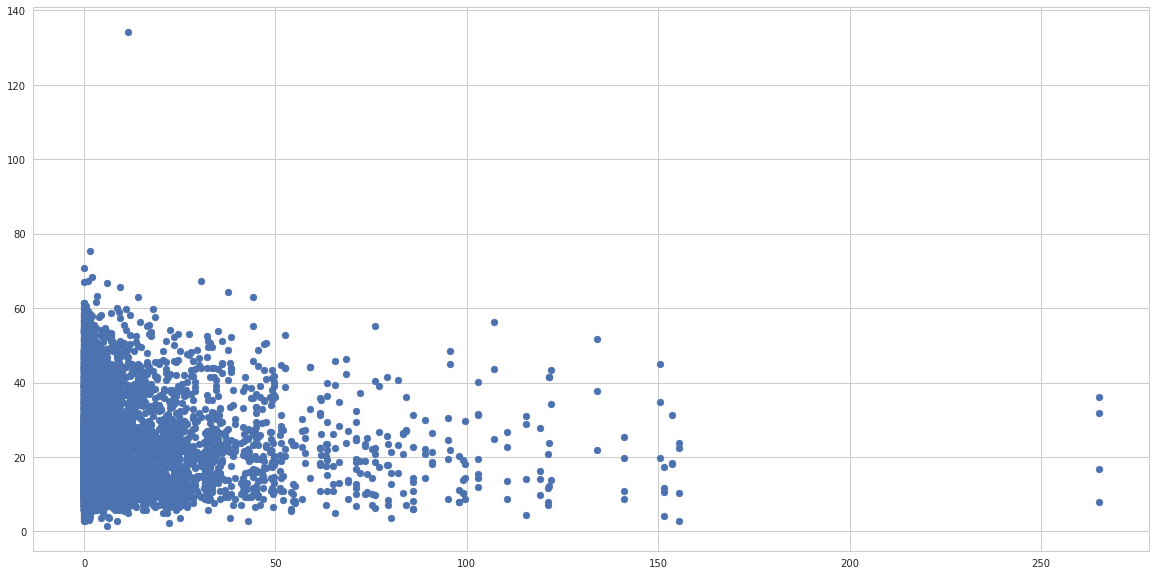

In [18]:
plt.scatter(x=cli_train_df['일강수량(mm)'],y=cli_train_df['수량'])

In [23]:
test = cli_train_df[cli_train_df['time'] == '저녁']

In [24]:
test.corr()['수량'].loc[test.corr()['수량'].abs() > 0.1]

수량                  1.000000
평균기온(°C)            0.217408
최저기온(°C)            0.211878
최고기온(°C)            0.215396
강수 계속시간(hr)        -0.107934
평균 이슬점온도(°C)        0.192033
평균 증기압(hPa)         0.198888
평균 현지기압(hPa)       -0.140489
최고 해면기압(hPa)       -0.155394
최저 해면기압(hPa)       -0.119139
평균 해면기압(hPa)       -0.139415
가조시간(hr)            0.173305
일 최심신적설(cm)        -0.139194
일 최심신적설 시각(hhmi)   -0.218968
일 최심적설(cm)         -0.194765
합계 3시간 신적설(cm)     -0.142020
평균 지면온도(°C)         0.214355
최저 초상온도(°C)         0.202069
평균 5cm 지중온도(°C)     0.213058
평균 10cm 지중온도(°C)    0.212912
평균 20cm 지중온도(°C)    0.212725
평균 30cm 지중온도(°C)    0.214708
0.5m 지중온도(°C)       0.206833
1.0m 지중온도(°C)       0.186011
1.5m 지중온도(°C)       0.170488
합계 소형증발량(mm)        0.111292
Name: 수량, dtype: float64

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 1 to 20007
Data columns (total 65 columns):
일자                     5196 non-null int64
time                   5196 non-null object
식사내용                   5196 non-null object
매출일자                   5196 non-null float64
수량                     5196 non-null float64
지점                     5196 non-null int64
일시                     5196 non-null datetime64[ns]
평균기온(°C)               5193 non-null float64
최저기온(°C)               5196 non-null float64
최저기온 시각(hhmi)          5196 non-null int64
최고기온(°C)               5196 non-null float64
최고기온 시각(hhmi)          5196 non-null int64
강수 계속시간(hr)            1942 non-null float64
10분 최다 강수량(mm)         1331 non-null float64
10분 최다강수량 시각(hhmi)     889 non-null float64
1시간 최다강수량(mm)          1331 non-null float64
1시간 최다 강수량 시각(hhmi)    932 non-null float64
일강수량(mm)               1942 non-null float64
최대 순간 풍속(m/s)          5195 non-null float64
최대 순간 풍속 풍향(16방위)      5195 non-null float